In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',90)

from sklearn.neighbors import KNeighborsRegressor

import scipy.stats

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression, BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [274]:
train0 = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

In [275]:
test0 = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [276]:
train0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [277]:
test0

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## Combining Data

### Removing columns to combine

In [278]:
test0_id = test0.Id
test0_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [279]:
test1 = test0.copy()
train1 = train0.copy()

In [280]:
target = train1.SalePrice
test1 = test1.drop(['Id'],axis=1)
train1 = train1.drop(['Id','SalePrice'],axis=1)

In [281]:
data1 = pd.concat([train1,test1], axis=0).reset_index(drop=True)
data1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [282]:
data2 = data1.copy()

In [283]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [284]:
data2['MSSubClass'] = data2['MSSubClass'].astype(str)

In [285]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [286]:
data2.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [287]:
data_obj = data2.select_dtypes('object').loc[:,data2.isnull().sum() > 0]
data_obj

,MSZoning,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
0,RL,NaN,AllPub,VinylSd,VinylSd,BrkFace,Gd,TA,No,GLQ,...,Typ,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN,WD
1,RL,NaN,AllPub,MetalSd,MetalSd,None,Gd,TA,Gd,ALQ,...,Typ,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN,WD
2,RL,NaN,AllPub,VinylSd,VinylSd,BrkFace,Gd,TA,Mn,GLQ,...,Typ,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN,WD
3,RL,NaN,AllPub,Wd Sdng,Wd Shng,None,TA,Gd,No,ALQ,...,Typ,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN,WD
4,RL,NaN,AllPub,VinylSd,VinylSd,BrkFace,Gd,TA,Av,GLQ,...,Typ,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,RM,NaN,AllPub,CemntBd,CmentBd,None,TA,TA,No,Unf,...,Typ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD
2915,RM,NaN,AllPub,CemntBd,CmentBd,None,TA,TA,No,Rec,...,Typ,NaN,CarPort,Unf,TA,TA,NaN,NaN,NaN,WD
2916,RL,NaN,AllPub,VinylSd,VinylSd,None,TA,TA,No,ALQ,...,Typ,TA,Detchd,Unf,TA,TA,NaN,NaN,NaN,WD
2917,RL,NaN,AllPub,HdBoard,Wd Shng,None,Gd,TA,Av,GLQ,...,Typ,NaN,NaN,NaN,NaN,NaN,NaN,MnPrv,Shed,WD


### Object columns where NaN means 'none'

In [288]:
data_obj.columns

Index(['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType'],
      dtype='object')

In [289]:
# checking with the info on the exercise:

# 'Alley', BsmtQual', 'BsmtCond', 
# 'BsmtExposure', 'BsmtFinType1', 
# 'BsmtFinType2', 'FireplaceQu', 
# 'GarageType', 'GarageFinish', 
# 'GarageQual', 'GarageCond',
# 'PoolQC', 'Fence', 'MiscFeature'


In [290]:
for column in [
    'Alley', 'BsmtQual', 'BsmtCond', 
    'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinType2', 'FireplaceQu', 
    'GarageType', 'GarageFinish', 
    'GarageQual', 'GarageCond',
    'PoolQC', 'Fence', 'MiscFeature'
]:
    data2[column] = data2[column].fillna('None')

In [291]:
data_obj = data2.select_dtypes('object').loc[:,data2.isnull().sum() > 0]
data_obj.columns

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Electrical', 'KitchenQual', 'Functional', 'SaleType'],
      dtype='object')

In [292]:
for column in [
    'MSZoning', 'Utilities', 'Exterior1st',
    'Exterior2nd', 'MasVnrType','Electrical',
    'KitchenQual', 'Functional', 'SaleType'
]:
    data2[column] = data2[column].fillna(data2[column].mode()[0])

In [293]:
data_obj = data2.select_dtypes('object').loc[:,data2.isnull().sum() > 0]
data_obj.columns

Index([], dtype='object')

In [294]:
data_num = data2.select_dtypes(np.number).loc[:,data2.isnull().sum()>0]
data_num

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,65.0,196.0,706.0,0.0,150.0,856.0,1.0,0.0,2003.0,2.0,548.0
1,80.0,0.0,978.0,0.0,284.0,1262.0,0.0,1.0,1976.0,2.0,460.0
2,68.0,162.0,486.0,0.0,434.0,920.0,1.0,0.0,2001.0,2.0,608.0
3,60.0,0.0,216.0,0.0,540.0,756.0,1.0,0.0,1998.0,3.0,642.0
4,84.0,350.0,655.0,0.0,490.0,1145.0,1.0,0.0,2000.0,3.0,836.0
...,...,...,...,...,...,...,...,...,...,...,...
2914,21.0,0.0,0.0,0.0,546.0,546.0,0.0,0.0,NaN,0.0,0.0
2915,21.0,0.0,252.0,0.0,294.0,546.0,0.0,0.0,1970.0,1.0,286.0
2916,160.0,0.0,1224.0,0.0,0.0,1224.0,1.0,0.0,1960.0,2.0,576.0
2917,62.0,0.0,337.0,0.0,575.0,912.0,0.0,1.0,NaN,0.0,0.0


In [295]:
data3 = data2.copy()

In [296]:
data3.select_dtypes(np.number).loc[:,data3.isnull().sum()>0].columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [297]:
def knn_numeric_missing(data,missing_column_target):
#     copy the data to avoid possible problem modifying the wrong data
    data = data.copy()
#     choose columns with numbers only
    numeric_data = data.select_dtypes(np.number)
    
#     choose columns inside the numbers only that doesn't have any missing value
    non_missing_columns = numeric_data.loc[:,numeric_data.isna().sum()==0].columns
    
#     inside the columns w/ number only, find the columns that doesn't have missing values
#     X_train, X_test, Y_train, Y_pred
#     X_train, rows without missing value and columns excepet the target
#     Y_train, rows without missing value and only the column target
#     X_test, rows where the target is missing, and all columns excepet the target
    X_train = numeric_data.loc[numeric_data[missing_column_target].isna()==False, non_missing_columns]
    Y_train = numeric_data.loc[numeric_data[missing_column_target].isna()==False, missing_column_target]
    X_test = numeric_data.loc[numeric_data[missing_column_target].isna()==True,non_missing_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, Y_train)
    
    y_pred = knn.predict(X_test)
    
    data.loc[numeric_data[missing_column_target].isna()==True,missing_column_target] = y_pred
    
    return data
    

In [298]:
for column in [
    'LotFrontage', 'MasVnrArea', 'BsmtFinSF1',
    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
    'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
    'GarageCars', 'GarageArea'
]:
    data3 = knn_numeric_missing(data3,column)

In [299]:
data3.select_dtypes(np.number).loc[:,data3.isnull().sum()>0].columns

Index([], dtype='object')

In [300]:
data4 = data3.copy()

## Feature Transformation

In [301]:
scipy.stats.skew(data4.select_dtypes(np.number))

array([ 1.34075114, 12.8224314 ,  0.19711045,  0.57031205, -0.59980555,
       -0.45102038,  2.60368152,  1.42551624,  4.14611071,  0.91932181,
        1.16280584,  1.46960442,  0.86167475, 12.088761  ,  1.26935769,
        0.62437257,  3.93159384,  0.16760573,  0.69456649,  0.32632435,
        4.30225437,  0.75836691,  0.7334946 , -0.34632694, -0.21859252,
        0.24089573,  1.84243281,  2.53511373,  4.00389122, 11.37606468,
        3.9466937 , 16.89832792, 21.94719481,  0.19588394,  0.13239881])

In [302]:
skew_df = pd.DataFrame(data4.select_dtypes(np.number).columns,columns=['Feature'])
skew_df['Skew'] = scipy.stats.skew(data4.select_dtypes(np.number))
skew_df['abs Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['abs Skew'].apply(lambda x: True if x>0.5 else False)
skew_df

,Feature,Skew,abs Skew,Skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True


In [303]:
skew_df.query('Skewed == True')['Feature']

0       LotFrontage
1           LotArea
3       OverallCond
4         YearBuilt
6        MasVnrArea
7        BsmtFinSF1
8        BsmtFinSF2
9         BsmtUnfSF
10      TotalBsmtSF
11         1stFlrSF
12         2ndFlrSF
13     LowQualFinSF
14        GrLivArea
15     BsmtFullBath
16     BsmtHalfBath
18         HalfBath
20     KitchenAbvGr
21     TotRmsAbvGrd
22       Fireplaces
26       WoodDeckSF
27      OpenPorchSF
28    EnclosedPorch
29        3SsnPorch
30      ScreenPorch
31         PoolArea
32          MiscVal
Name: Feature, dtype: object

In [304]:
skew_df.loc[skew_df['Skewed']==True]

,Feature,Skew,abs Skew,Skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True
10,TotalBsmtSF,1.162806,1.162806,True
11,1stFlrSF,1.469604,1.469604,True


In [305]:
# skew_df.loc[skew_df['Skewed']==True].Feature
data4[skew_df.loc[skew_df['Skewed']==True].Feature.values].describe()

,LotFrontage,LotArea,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,70.154916,10168.114080,5.564577,1971.312778,102.189654,441.332580,49.576841,560.797670,1051.679822,1159.581706,...,1.044536,6.451524,0.597122,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968
std,22.697641,7886.996359,1.113131,30.291442,178.934095,455.559081,169.176867,439.470508,440.722380,392.362079,...,0.214462,1.569379,0.646129,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211
min,21.000000,1300.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7478.000000,5.000000,1953.500000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,...,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,70.000000,9453.000000,5.000000,1973.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,...,1.000000,6.000000,1.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.100000,11570.000000,6.000000,2001.000000,164.000000,733.000000,0.000000,805.000000,1302.000000,1387.500000,...,1.000000,7.000000,1.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,9.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,...,3.000000,15.000000,4.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000


In [306]:
for column in data4[skew_df.loc[skew_df['Skewed']==True].Feature.values]:
    data4[column] = np.log1p(data4[column])
data4[skew_df.loc[skew_df['Skewed']==True].Feature.values].describe()

,LotFrontage,LotArea,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,4.211550,9.094915,1.867152,7.586843,2.109776,4.226730,0.682190,5.627430,6.733109,7.004186,...,0.710829,1.986955,0.389300,2.449664,2.333006,0.757435,0.066197,0.451214,0.027361,0.234767
std,0.341238,0.509882,0.173171,0.015433,2.622741,2.980867,1.879238,1.866516,1.175876,0.322650,...,0.088196,0.206864,0.394826,2.592335,2.154239,1.771894,0.587089,1.459808,0.410265,1.240206
min,3.091042,7.170888,0.693147,7.535297,0.000000,0.000000,0.000000,0.000000,0.000000,5.814131,...,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.110874,8.919854,1.791759,7.577890,0.000000,0.000000,0.000000,5.398163,6.677083,6.776507,...,0.693147,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.262680,9.154193,1.791759,7.587817,0.000000,5.910797,0.000000,6.148468,6.897705,6.987490,...,0.693147,1.945910,0.693147,0.000000,3.295837,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.395682,9.356257,1.945910,7.601902,5.105945,6.598509,0.000000,6.692083,7.172425,7.235979,...,0.693147,2.079442,0.693147,5.129899,4.262680,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.749393,12.279537,2.302585,7.606387,7.378384,8.638525,7.331060,7.756623,8.717846,8.536211,...,1.386294,2.772589,1.609438,7.261927,6.610696,6.920672,6.232448,6.357842,6.685861,9.741027


In [307]:
skew_df = pd.DataFrame(data4.select_dtypes(np.number).columns,columns=['Feature'])
skew_df['Skew'] = scipy.stats.skew(data4.select_dtypes(np.number))
skew_df['abs Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['abs Skew'].apply(lambda x: True if x>0.5 else False)
skew_df

,Feature,Skew,abs Skew,Skewed
0,LotFrontage,-0.929468,0.929468,True
1,LotArea,-0.504751,0.504751,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,-0.746183,0.746183,True
4,YearBuilt,-0.626215,0.626215,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,0.511138,0.511138,True
7,BsmtFinSF1,-0.618036,0.618036,True
8,BsmtFinSF2,2.458996,2.458996,True
9,BsmtUnfSF,-2.159204,2.159204,True


In [308]:
data5 = data4.copy()

## Encoding Categorical Data

In [309]:
data5 = pd.get_dummies(data5)
data5

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.189655,9.042040,7,1.791759,7.602900,2003,5.283204,6.561031,0.0,5.017280,...,0,0,0,1,0,0,0,0,1,0
1,4.394449,9.169623,6,2.197225,7.589336,1976,0.000000,6.886532,0.0,5.652489,...,0,0,0,1,0,0,0,0,1,0
2,4.234107,9.328212,7,1.791759,7.601902,2002,5.093750,6.188264,0.0,6.075346,...,0,0,0,1,0,0,0,0,1,0
3,4.110874,9.164401,7,1.791759,7.557995,1970,0.000000,5.379897,0.0,6.293419,...,0,0,0,1,1,0,0,0,0,0
4,4.442651,9.565284,8,1.791759,7.601402,2000,5.860786,6.486161,0.0,6.196444,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3.091042,7.568896,4,2.079442,7.586296,1970,0.000000,0.000000,0.0,6.304449,...,0,0,0,1,0,0,0,0,1,0
2915,3.091042,7.546974,4,1.791759,7.586296,1970,0.000000,5.533389,0.0,5.686975,...,0,0,0,1,1,0,0,0,0,0
2916,5.081404,9.903538,5,2.079442,7.581210,1996,0.000000,7.110696,0.0,0.000000,...,0,0,0,1,1,0,0,0,0,0
2917,4.143135,9.253591,5,1.791759,7.597396,1992,0.000000,5.823046,0.0,6.356108,...,0,0,0,1,0,0,0,0,1,0


In [310]:
data6 = data5.copy()

## Scaling

In [311]:
scaler = StandardScaler()
scaler.fit(data6)
data6 = pd.DataFrame(scaler.transform(data6), index=data6.index,columns=data6.columns)
data6

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-3.284214,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804554,-1.418196,-0.363076,0.362780,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2915,-3.284214,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.438424,-0.363076,0.031907,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2916,2.549545,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804554,0.967658,-0.363076,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
2917,-0.200527,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804554,0.535612,-0.363076,0.390461,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


## Target Transformation

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

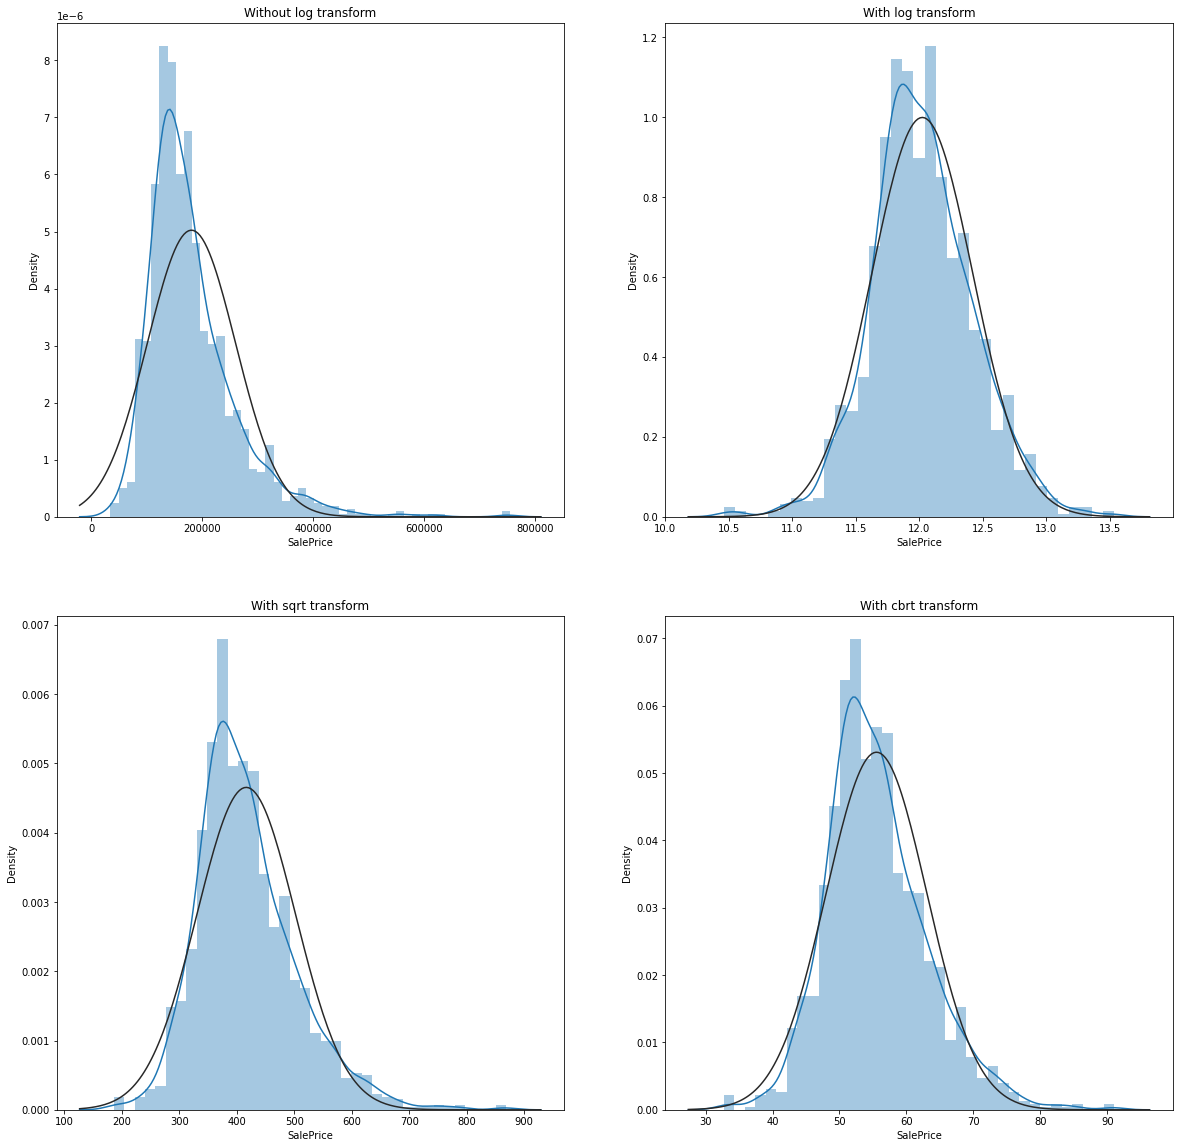

In [312]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title('Without log transform')

plt.subplot(2,2,2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.title('With log transform')

plt.subplot(2,2,3)
sns.distplot(np.sqrt(target), kde=True, fit=scipy.stats.norm)
plt.title('With sqrt transform')

plt.subplot(2,2,4)
sns.distplot(np.cbrt(target), kde=True, fit=scipy.stats.norm)
plt.title('With cbrt transform')

plt.show()

In [313]:
data7 = data6.copy()

In [314]:
log_target = np.log(target)

## Split Data

In [315]:
train_final = data7.loc[:train0.index.max(),:].copy()
test_final = data7.loc[train0.index.max()+1:,:].reset_index(drop=True).copy()

In [316]:
train_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.064176,-0.103719,0.646183,-0.435439,1.040634,0.896833,1.210174,0.783229,-0.363076,-0.326949,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.536077,0.146544,-0.063185,1.906370,0.161526,-0.395604,-0.804554,0.892444,-0.363076,0.013428,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.066112,0.457629,0.646183,-0.435439,0.975922,0.848965,1.137926,0.658154,-0.363076,0.240016,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,-0.295084,0.136301,0.646183,-0.435439,-1.869638,-0.682812,-0.804554,0.386923,-0.363076,0.356870,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
4,0.677357,0.922662,1.355551,-0.435439,0.943542,0.753229,1.430432,0.758108,-0.363076,0.304906,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.200527,-0.231508,-0.063185,-0.435439,0.911146,0.753229,-0.804554,-1.418196,-0.363076,0.660828,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1456,0.711638,0.767440,-0.063185,0.454875,0.227056,0.178812,1.021136,0.820898,2.351183,0.403330,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1457,-0.020100,0.029092,0.646183,2.514892,-0.996100,1.040437,-0.804554,0.467619,-0.363076,0.616343,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1458,0.066112,0.170303,-0.772552,0.454875,-0.696444,0.561757,-0.804554,-0.105594,3.329113,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


In [317]:
test_final

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.536077,0.521437,-0.772552,0.454875,-0.332070,-1.113625,-0.804554,0.645518,2.285649,-0.013563,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1,0.572040,0.923625,-0.063185,0.454875,-0.431241,-1.257229,0.984472,0.873044,-0.363076,0.204364,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
2,0.310504,0.862607,-0.772552,-0.435439,0.846305,0.657493,-0.804554,0.821322,-0.363076,-0.375189,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
3,0.462798,0.222291,-0.063185,0.454875,0.878733,0.657493,0.356462,0.729841,-0.363076,0.083804,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
4,-1.252596,-1.130892,1.355551,-0.435439,0.683917,0.370284,-0.804554,0.452704,-0.363076,0.695621,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-3.284214,-2.993401,-1.481920,1.226101,-0.035461,-0.682812,-0.804554,-1.418196,-0.363076,0.362780,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693
1455,-3.284214,-3.036401,-1.481920,-0.435439,-0.035461,-0.682812,-0.804554,0.438424,-0.363076,0.031907,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
1456,2.549545,1.586172,-0.772552,1.226101,-0.365110,0.561757,-0.804554,0.967658,-0.363076,-3.015455,...,-0.052423,-0.298629,-0.049029,0.394439,3.789876,-0.064249,-0.09105,-0.126535,-2.155466,-0.302693
1457,-0.200527,0.311255,-0.772552,-0.435439,0.683917,0.370284,-0.804554,0.535612,-0.363076,0.390461,...,-0.052423,-0.298629,-0.049029,0.394439,-0.263861,-0.064249,-0.09105,-0.126535,0.463937,-0.302693


## Model Testing

### Hyperparameter Tuning - Random Forest

In [318]:
# randomForest_Tuning = RandomForestRegressor()

In [319]:
# n_estimators = [5,20,50,100]
# max_features = ['sqrt']
# max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
# min_samples_split = [2, 6, 10]
# min_samples_leaf = [1, 3, 4]
# bootstrap = [True, False]

# random_grid = {'n_estimators': n_estimators,
# 'max_features': max_features,
# 'max_depth': max_depth,
# 'min_samples_split': min_samples_split,
# 'min_samples_leaf': min_samples_leaf,
# 'bootstrap': bootstrap}

In [320]:
# rf_random = RandomizedSearchCV(estimator = randomForest_Tuning,param_distributions = random_grid,
#                n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [321]:
# rf_random.fit(train_final, log_target)

In [322]:
# print ('Best Parameters: ', rf_random.best_params_, ' \n')

### Hyperparameter Tuning - Catboost

In [323]:
#  catTun = CatBoostRegressor()

In [324]:
# max_depth_Cat = [4,6,8,10]
# eta_Cat = [0.1,0.3,0.5]
# n_estimators_Cat = [50,100,150,200]
# verbose_Cat = [0]



# paramsCat = {
#     'max_depth': max_depth_Cat,
#     'n_estimators': n_estimators_Cat,
#     'eta': eta_Cat,
#     'verbose':verbose_Cat
# #     'subsample': 1,
# #     'colsample_bytree': 1,
# }

In [325]:
# Cat_random = RandomizedSearchCV(estimator = catTun, param_distributions = paramsCat,
#                n_iter = 100, cv = 5, verbose=0, random_state=35, n_jobs = -1)

In [326]:
# Cat_random.fit(train_final, log_target)

In [327]:
# print ('Best Parameters: ', Cat_random.best_params_, ' \n')

In [328]:
models = {
    'linreg': LinearRegression(),
    'catboost': CatBoostRegressor(verbose=0),
#     'catboostT': CatBoostRegressor(verbose=0,
#                                    n_estimators= 50,
#                                    max_depth= 8,
#                                    eta= 0.1),
    'catboostT': CatBoostRegressor(verbose=0,
                                   iterations= 6000,
                                   learning_rate= 0.005,
                                   depth= 4,
                                   l2_leaf_reg= 1,
                                   eval_metric='RMSE',
                                   early_stopping_rounds= 200,
                                   random_seed= 42),    
    'randomForest': RandomForestRegressor(),
    'randomForestT': RandomForestRegressor(n_estimators = 50, 
                                          min_samples_split = 2, 
                                          min_samples_leaf= 4, 
                                          max_features = 'sqrt', 
                                          max_depth= 80, 
                                          bootstrap=True),  
    'bayesianridge': BayesianRidge(),
#     'huberregressor': HuberRegressor(),
    'ridge': Ridge(),
    'OMP': OrthogonalMatchingPursuit(normalize=False),
    'LGBM': LGBMRegressor(),
    'GBR': GradientBoostingRegressor(),
    'XGBR': XGBRegressor()    
}

In [329]:
for name, model in models.items():
    model.fit(train_final, log_target)
    print(name + ' - trained')

linreg - trained
catboost - trained
catboostT - trained
randomForest - trained
randomForestT - trained
bayesianridge - trained
ridge - trained
OMP - trained
LGBM - trained
GBR - trained
XGBR - trained


In [330]:
results = {}

In [331]:
kf = KFold(n_splits=5)

In [332]:
for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, train_final, log_target, scoring='neg_mean_squared_error', cv=kf)))
    results[name] = result

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [333]:
results

{'linreg': array([inf, inf, inf, inf, inf]),
 'catboost': array([1.11048758, 1.14247147, 1.13280305, 1.1125147 , 1.13293983]),
 'catboostT': array([1.11076963, 1.13933937, 1.13046301, 1.11254942, 1.13131548]),
 'randomForest': array([1.14781569, 1.16676831, 1.15526342, 1.13882324, 1.16073762]),
 'randomForestT': array([1.1514502 , 1.18753902, 1.188201  , 1.16035765, 1.17032417]),
 'bayesianridge': array([1.12177536, 1.1530701 , 1.15708716, 1.11695778, 1.16263458]),
 'ridge': array([1.12903961, 1.15724533, 1.17618924, 1.12014461, 1.16912087]),
 'OMP': array([1.11552884, 1.15039953, 1.1594196 , 1.1190573 , 1.16459568]),
 'LGBM': array([1.13263357, 1.15653465, 1.1479812 , 1.12498124, 1.14092261]),
 'GBR': array([1.12393912, 1.15033466, 1.13984212, 1.12338263, 1.13993092]),
 'XGBR': array([1.14269776, 1.16720695, 1.14797591, 1.14212549, 1.15668277])}

In [334]:
for name, result in results.items():
    print('\n-----\n'+name)
    print(np.mean(result))
    print(np.std(result))


-----
linreg
inf
nan

-----
catboost
1.126243325220393
0.012553442506294745

-----
catboostT
1.124887382153042
0.011249927871409937

-----
randomForest
1.153881654851572
0.009782955896374828

-----
randomForestT
1.171574407650313
0.014585437318843878

-----
bayesianridge
1.1423049959360094
0.019034911218863314

-----
ridge
1.1503479299182395
0.022063796561560402

-----
OMP
1.141800191697896
0.020549691948539006

-----
LGBM
1.14061065303981
0.011098722272885778

-----
GBR
1.1354858916172805
0.010383043014061488

-----
XGBR
1.1513377768142876
0.009499660320744776


/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


## Combining

In [344]:
final_predictions = np.exp(
    0.3 * (models['bayesianridge'].predict(test_final)) +
    0.2 * (models['catboostT'].predict(test_final)) +
    0.1 * (models['randomForest'].predict(test_final)) +
    0.1 * (models['OMP'].predict(test_final)) +
    0.3 * (models['GBR'].predict(test_final))
)

In [345]:
final_predictions

array([123738.92795626, 158181.21686817, 183030.59670706, ...,
       158962.78221101, 117841.82419641, 227070.51166037])

## Exporting Solution

In [346]:
# add the file name as string with .csv
def exportSolution(predict,filename):
    new_data_predictions = pd.DataFrame(predict, columns=['SalePrice'])
    solution = pd.concat([test0['Id'],new_data_predictions],axis=1)
    print(solution)
    solution.to_csv(filename,index=False)
    return

In [347]:
exportSolution(final_predictions,'submission.csv')

        Id      SalePrice
0     1461  123738.927956
1     1462  158181.216868
2     1463  183030.596707
3     1464  192679.324786
4     1465  196893.189265
...    ...            ...
1454  2915   82368.127055
1455  2916   83384.906986
1456  2917  158962.782211
1457  2918  117841.824196
1458  2919  227070.511660

[1459 rows x 2 columns]


In [348]:
# 1st 0.41643
# 2nd 0.12605
# 3rd 0.12454